# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.002
-0.002
-0.003
-0.003
-0.003
-0.002
-0.004
-0.004
-0.004
0.983
0.985
0.985
0.984
0.983
1.977
1.977
1.975
1.975
2.963
2.968
2.967
2.965
2.966
3.951
3.955
3.955
3.953
3.954
4.942
4.942
4.94
4.94
5.928
5.932
5.931
5.929
5.93
6.871
6.875
6.875
6.874
6.874
7.815
7.82
7.82
7.82
7.819
8.809
8.814
8.814
8.812
8.812
9.797
9.8
9.802
9.801
9.801
10.79
10.794
10.795
10.794
10.794
11.787
11.79
11.789
11.788
11.788
12.777
12.781
12.781
12.78
12.78
13.768
13.772
13.771
13.77
13.77
14.373
14.373
14.372
14.371
14.977
14.977
14.977
14.977
15.968
15.968
15.97
15.97
16.961
16.959
16.954
16.96
17.954
17.954
17.953
17.953
18.951
18.951
18.948
18.948
19.946
19.946
19.946
20.944
20.943
20.941
20.942
21.668
21.669
21.669
21.669
21.669
22.398
22.398
22.394
22.394
23.389
23.389
23.388
23.388
24.388
24.388
24.387
24.386
25.376
25.376
25.375
25.375
26.371
26.371
26.371
26

56.28
56.28
56.279
56.279
56.279
56.279
56.279
56.278
56.278
56.352
56.352
56.417
56.417
56.477
56.477
56.477
56.54
56.54
56.541
56.541
56.541
56.541
56.54
56.54
56.54
56.604
56.604
56.605
56.604
56.603
56.603
56.603
56.605
56.604
56.603
56.603
56.602
56.602
56.602
56.602
56.602
56.601
56.601
56.601
56.601
56.601
56.6
56.6
56.6
56.599
56.599
56.599
56.599
56.599
56.599
56.599
56.599
56.599
56.601
56.601
56.601
56.601
56.6
56.599
56.599
56.599
56.599
56.598
56.598
56.781
56.781
56.781
56.781
56.781
56.781
56.781
56.825
56.825
56.825
56.825
56.825
56.825
56.825
56.824
56.825
56.825
56.824
56.824
56.823
56.823
56.822
56.822
56.822
56.822
56.821
56.821
56.821
56.821
56.821
56.821
56.821
56.821
56.821
56.821
56.82
56.819
56.819
56.819
56.82
56.82
56.821
56.821
56.821
56.821
56.819
56.819
56.819
56.819
56.819
56.818
56.818
56.817
56.817
56.817
56.877
56.93
56.979
57.027
57.074
57.074
57.074
57.074
57.074
57.118
57.118
57.118
57.118
57.116
57.162
57.162
57.161
57.161
57.161
57.161
57.161
57.1

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1433,2866,59.646
1434,2868,59.646
1435,2870,59.644
1436,2872,59.644


<IPython.core.display.Javascript object>


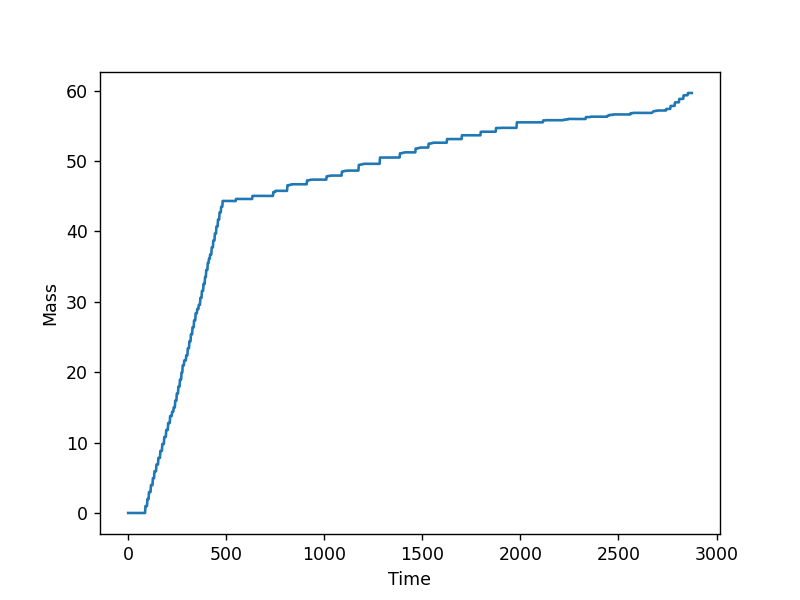

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_050523_S379-384.csv')